<h3>Step 1: Import Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib


<h3>Step 2: Load the Data </h3>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
with open ('/content/drive/MyDrive/btc_1d_data_2018_to_2024-09-06.csv') as file:
  df = pd.read_csv(file,sep=',')

In [4]:
df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595,3961.938946,5.280975e+07,0
1,2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018-01-02 23:59:59.999,2.797171e+08,177728,11346.326739,1.580801e+08,0
2,2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018-01-03 23:59:59.999,2.361169e+08,162787,8994.953566,1.335873e+08,0
3,2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018-01-04 23:59:59.999,3.127816e+08,170310,12680.812951,1.861168e+08,0
4,2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018-01-05 23:59:59.999,3.693220e+08,192969,13346.622293,2.118299e+08,0


In [5]:
df.shape


(2441, 12)

<h3>Step 3: Data Preprocessing </h3>

In [6]:
# Check for missing values
df.isnull().sum()

,0
Open time,0
Open,0
High,0
Low,0
Close,0
Volume,0
Close time,0
Quote asset volume,0
Number of trades,0
Taker buy base asset volume,0


In [8]:
# Drop rows with missing values
df = df.dropna()

In [ ]:
df.shape

(2007, 19)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open time                     2441 non-null   object 
 1   Open                          2441 non-null   float64
 2   High                          2441 non-null   float64
 3   Low                           2441 non-null   float64
 4   Close                         2441 non-null   float64
 5   Volume                        2441 non-null   float64
 6   Close time                    2441 non-null   object 
 7   Quote asset volume            2441 non-null   float64
 8   Number of trades              2441 non-null   int64  
 9   Taker buy base asset volume   2441 non-null   float64
 10  Taker buy quote asset volume  2441 non-null   float64
 11  Ignore                        2441 non-null   int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 229.0+ KB


In [10]:
# Convert date columns to datetime
df['Open time'] = pd.to_datetime(df['Open time'])
df['Close time'] = pd.to_datetime(df['Close time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Open time                     2441 non-null   datetime64[ns]
 1   Open                          2441 non-null   float64       
 2   High                          2441 non-null   float64       
 3   Low                           2441 non-null   float64       
 4   Close                         2441 non-null   float64       
 5   Volume                        2441 non-null   float64       
 6   Close time                    2441 non-null   datetime64[ns]
 7   Quote asset volume            2441 non-null   float64       
 8   Number of trades              2441 non-null   int64         
 9   Taker buy base asset volume   2441 non-null   float64       
 10  Taker buy quote asset volume  2441 non-null   float64       
 11  Ignore                        

In [ ]:
# Set the open time as the index
df.set_index('Open time', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2145 entries, 2018-01-01 to 2024-09-06
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Open                          2145 non-null   float64       
 1   High                          2145 non-null   float64       
 2   Low                           2145 non-null   float64       
 3   Close                         2145 non-null   float64       
 4   Volume                        2145 non-null   float64       
 5   Close time                    2145 non-null   datetime64[ns]
 6   Quote asset volume            2145 non-null   float64       
 7   Number of trades              2145 non-null   int64         
 8   Taker buy base asset volume   2145 non-null   float64       
 9   Taker buy quote asset volume  2145 non-null   float64       
 10  Ignore                        2145 non-null   int64         
dtypes: datetime6

In [ ]:
# Remove duplicates
df = df[~df.index.duplicated(keep='first')]

In [ ]:
# Fill missing values (if any)
df.fillna(method='ffill', inplace=True)

<ipython-input-123-26b414a3f244>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
#Dimensions
df.shape

(2145, 11)

In [ ]:
# Handle outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
#Dimensions
df.shape

(2007, 11)

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
Open time,,,,,,,,,,,
2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595,3961.938946,5.280975e+07,0
2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018-01-02 23:59:59.999,2.797171e+08,177728,11346.326739,1.580801e+08,0
2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018-01-03 23:59:59.999,2.361169e+08,162787,8994.953566,1.335873e+08,0
2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018-01-04 23:59:59.999,3.127816e+08,170310,12680.812951,1.861168e+08,0
2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018-01-05 23:59:59.999,3.693220e+08,192969,13346.622293,2.118299e+08,0


In [ ]:
# Create new features
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek
df['Quarter'] = df.index.quarter

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,Year,Month,Day,DayOfWeek,Quarter,MA7,MA30,MA90
Open time,,,,,,,,,,,,,,,,,,,
2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595,3961.938946,5.280975e+07,0,2018,1,1,0,1,NaN,NaN,NaN
2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018-01-02 23:59:59.999,2.797171e+08,177728,11346.326739,1.580801e+08,0,2018,1,2,1,1,NaN,NaN,NaN
2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018-01-03 23:59:59.999,2.361169e+08,162787,8994.953566,1.335873e+08,0,2018,1,3,2,1,NaN,NaN,NaN
2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018-01-04 23:59:59.999,3.127816e+08,170310,12680.812951,1.861168e+08,0,2018,1,4,3,1,NaN,NaN,NaN
2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018-01-05 23:59:59.999,3.693220e+08,192969,13346.622293,2.118299e+08,0,2018,1,5,4,1,NaN,NaN,NaN


In [ ]:
# Moving averages
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()
df['MA90'] = df['Close'].rolling(window=90).mean()

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,Year,Month,Day,DayOfWeek,Quarter,MA7,MA30,MA90
Open time,,,,,,,,,,,,,,,,,,,
2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595,3961.938946,5.280975e+07,0,2018,1,1,0,1,NaN,NaN,NaN
2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018-01-02 23:59:59.999,2.797171e+08,177728,11346.326739,1.580801e+08,0,2018,1,2,1,1,NaN,NaN,NaN
2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018-01-03 23:59:59.999,2.361169e+08,162787,8994.953566,1.335873e+08,0,2018,1,3,2,1,NaN,NaN,NaN
2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018-01-04 23:59:59.999,3.127816e+08,170310,12680.812951,1.861168e+08,0,2018,1,4,3,1,NaN,NaN,NaN
2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018-01-05 23:59:59.999,3.693220e+08,192969,13346.622293,2.118299e+08,0,2018,1,5,4,1,NaN,NaN,NaN


<h3>Exploratory Data Analysis (EDA) </h3>

In [ ]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Close time,0
Quote asset volume,0
Number of trades,0
Taker buy base asset volume,0
Taker buy quote asset volume,0


In [ ]:
df['MA7'].fillna(df['MA7'].mean(), inplace=True)
df['MA30'].fillna(df['MA30'].median(), inplace=True)
df['MA90'].fillna(df['MA90'].mode()[0], inplace=True)



In [ ]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Close time,0
Quote asset volume,0
Number of trades,0
Taker buy base asset volume,0
Taker buy quote asset volume,0


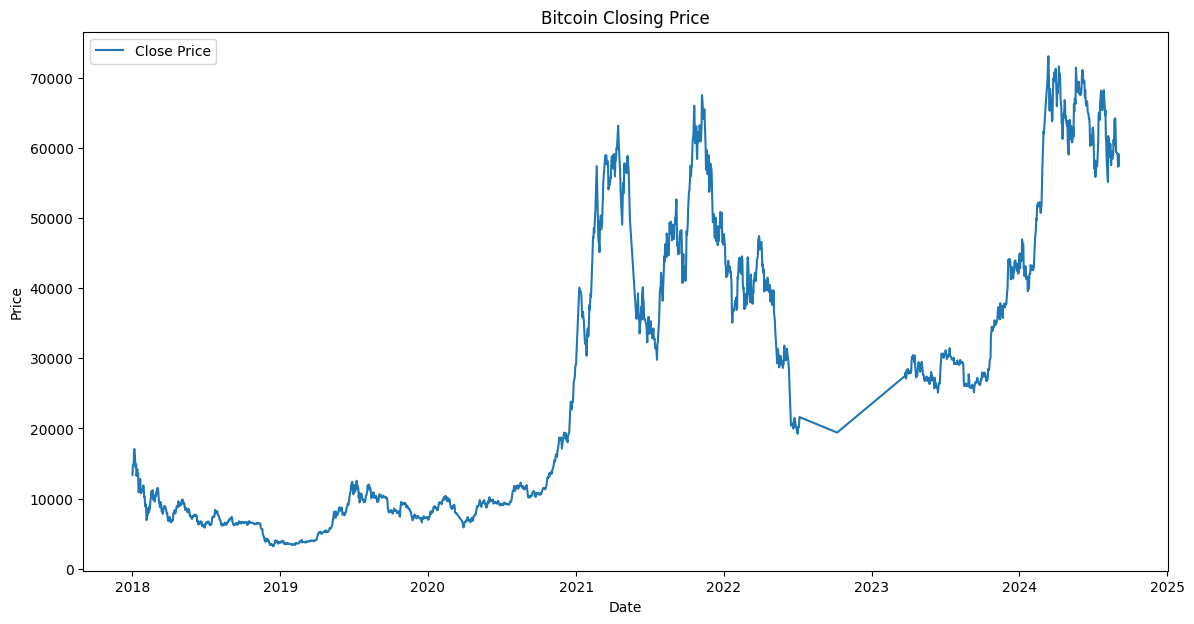

In [ ]:
# Plot closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.title('Bitcoin Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


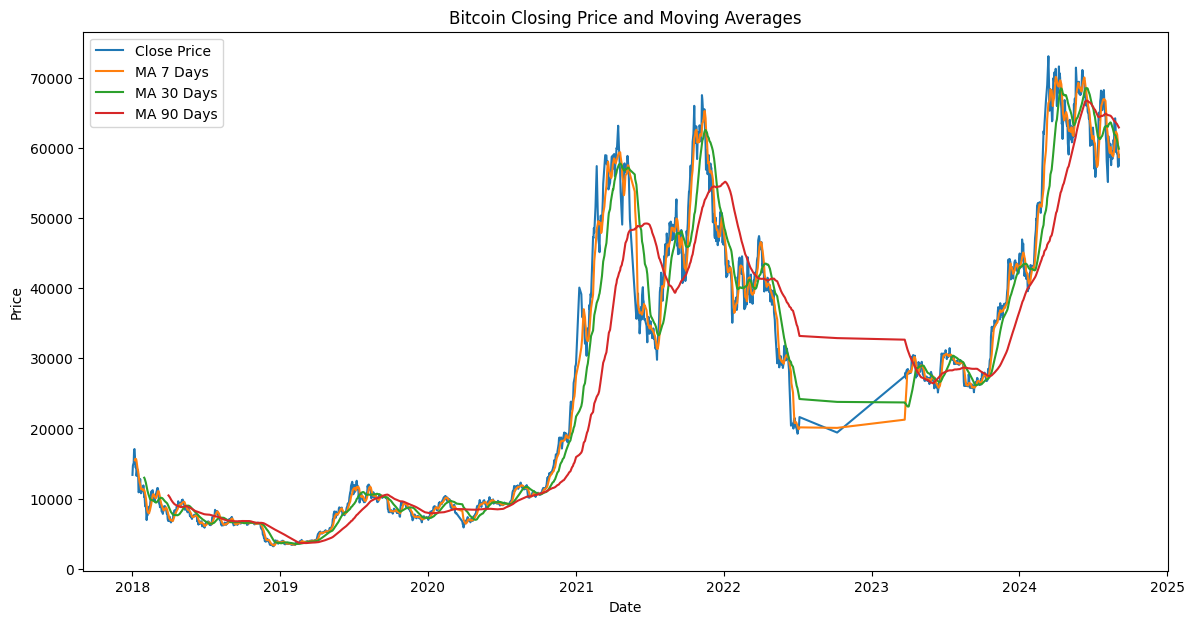

In [ ]:
# Plot moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA7'], label='MA 7 Days')
plt.plot(df['MA30'], label='MA 30 Days')
plt.plot(df['MA90'], label='MA 90 Days')
plt.title('Bitcoin Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

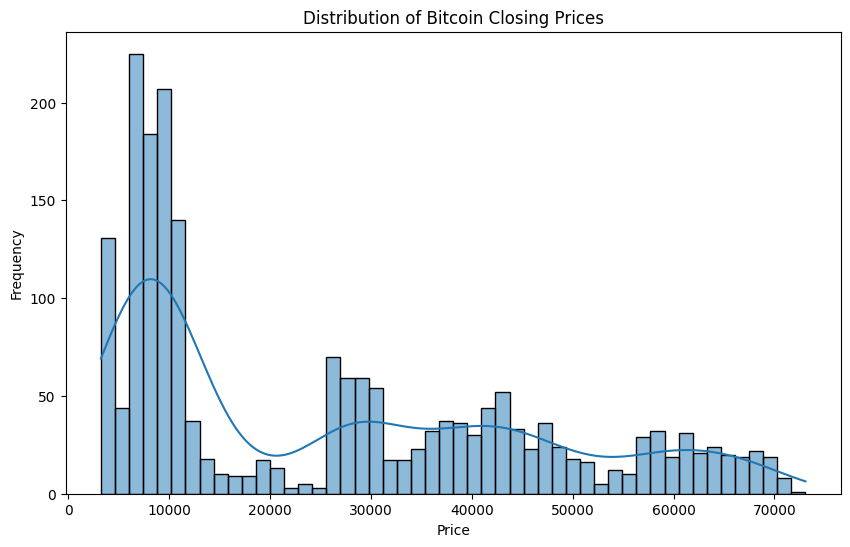

In [ ]:
# Distribution of closing prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Bitcoin Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

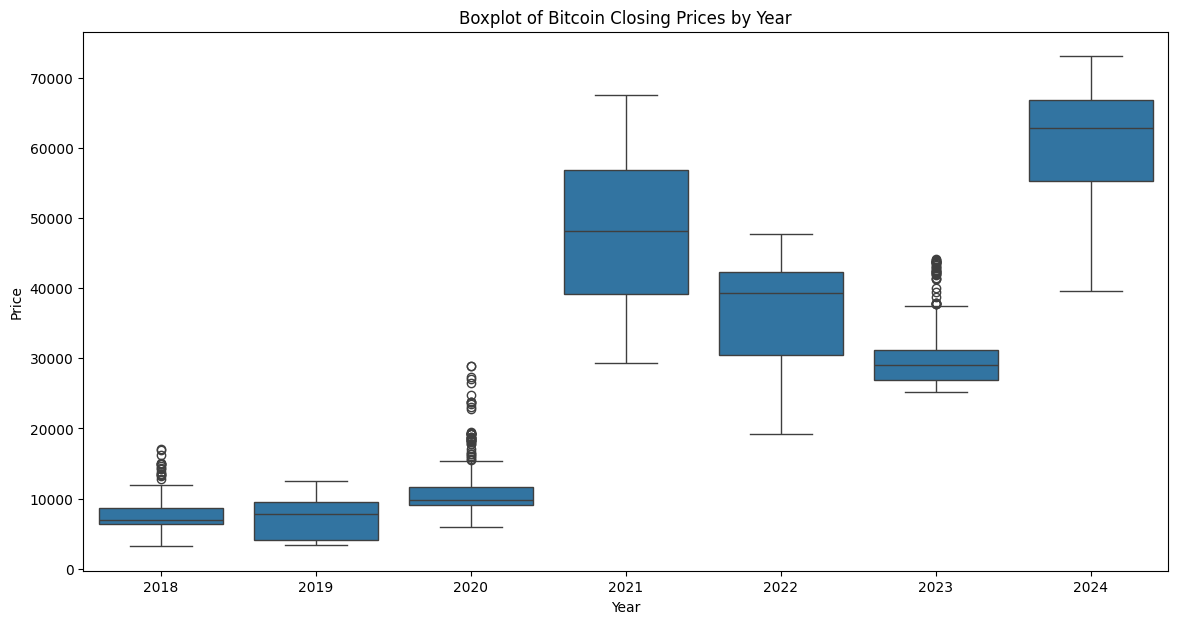

In [ ]:
# Boxplot of closing prices by year
plt.figure(figsize=(14, 7))
sns.boxplot(x='Year', y='Close', data=df)
plt.title('Boxplot of Bitcoin Closing Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

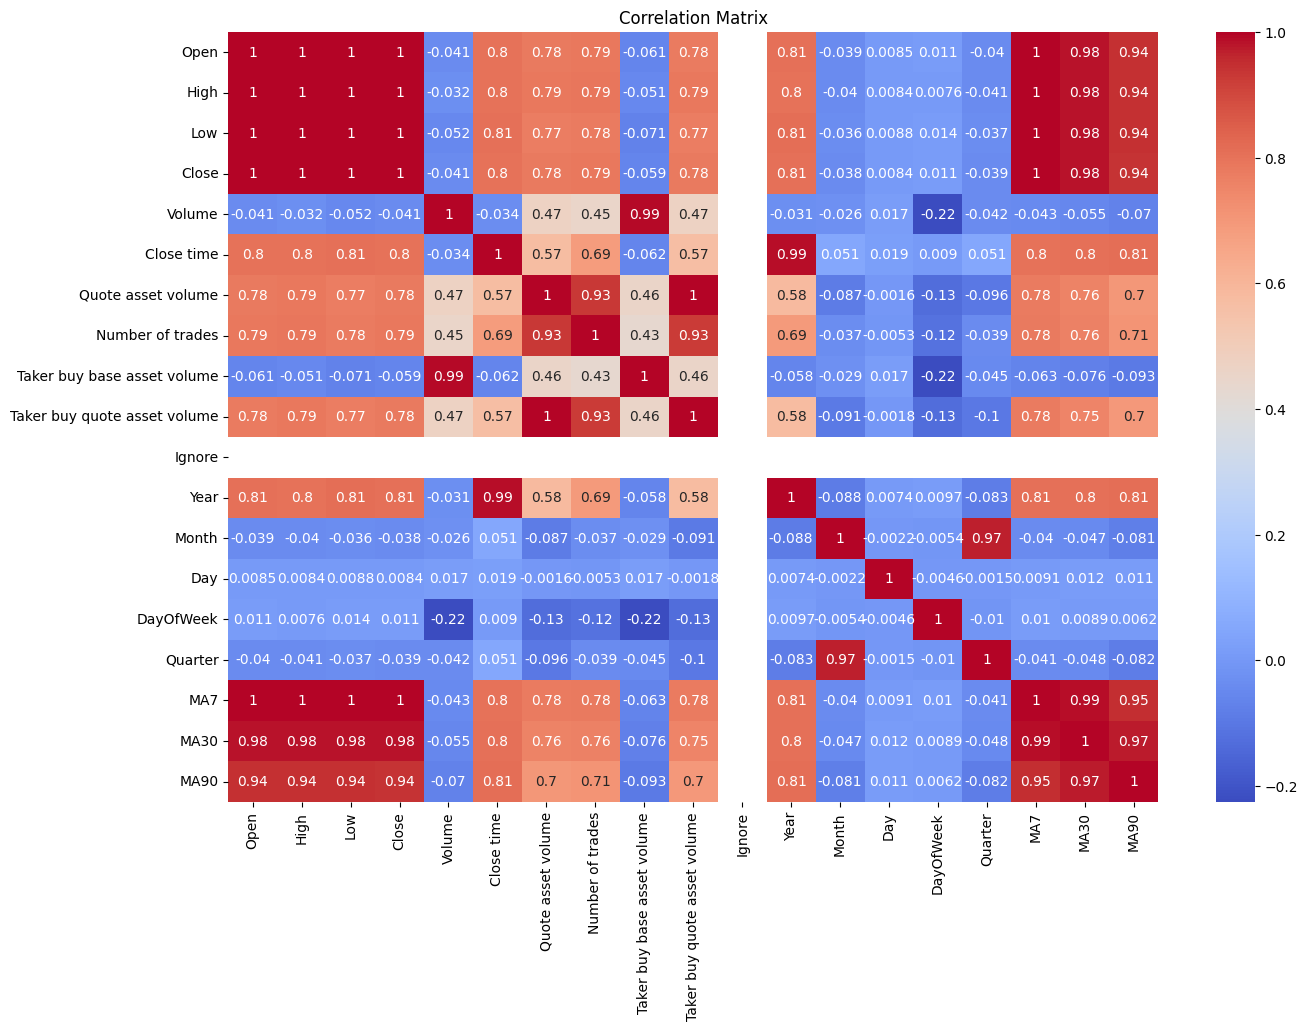

In [ ]:
# Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<h3>Feature Engineering  </h3>

In [ ]:
# Features and target
features = ['Open', 'High', 'Low', 'Volume', 'MA7', 'MA30', 'MA90', 'Year', 'Month', 'Day', 'DayOfWeek', 'Quarter']
target = 'Close'

X = df[features]
y = df[target]

In [ ]:
# Scale the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(X)

<h3>Splitting data, Model Selection and Model Training </h3>

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

<h3>Model Evaluation </h3>


Mean Squared Error: 224511.52942316246


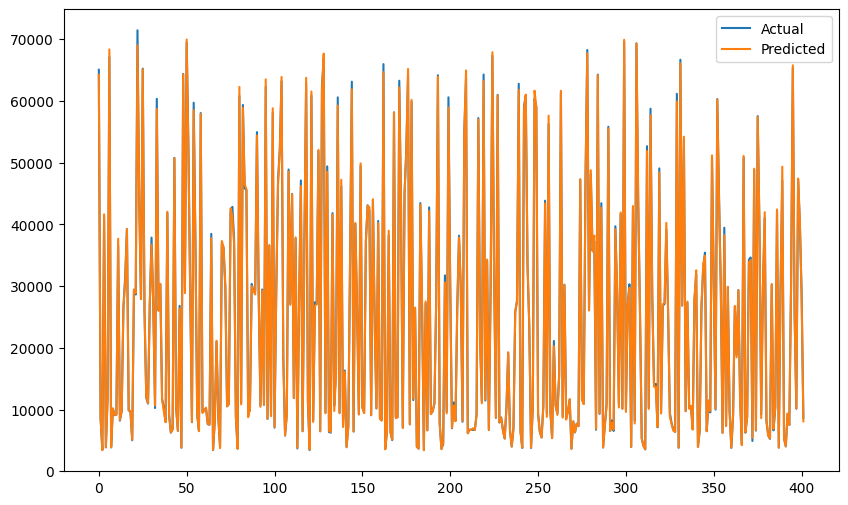

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


<h3>Model Deployment </h3>

In [ ]:
# Save the model
joblib.dump(model, 'bitcoin_price_predictor.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

<h3>Loading and Using the Model</h3>


In [ ]:
# Load the model and scaler
model = joblib.load('bitcoin_price_predictor.pkl')
scaler = joblib.load('scaler.pkl')

# Example of making a prediction
new_data = np.array([[50000, 51000, 49000, 1000000, 2024, 9, 12, 21, 4,1,1,1]])  # Example data
new_data_scaled = scaler.transform(new_data)
predicted_price = model.predict(new_data_scaled)
print(f'Predicted Bitcoin Price: {predicted_price[0]}')


Predicted Bitcoin Price: 3271.9904999999985


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
